In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader2

import torchvision
from torchvision.datasets import FashionMNIST
from torchvision.transforms import transforms


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import classification_report , confusion_matrix


In [2]:
batch_size = 64

In [3]:
train_dataset = FashionMNIST(root='Datasets/',download=True,transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='Datasets/',train=False,transform=transforms.ToTensor())

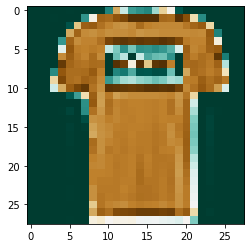

In [4]:
plt.imshow(train_dataset[1][0][0,:,:],cmap='BrBG_r')


In [5]:
# from PIL import Image as im
# img = plt.imread('download.jpeg')
# ar = img.reshape(28,28)
# torch.tensor(img)
# plt.imshow(img)
# train_dataset[0][0].numpy().shape

In [6]:
def plot_loss(loss):
        '''
        Plots the loss curve
        '''
        fig = plt.figure(figsize=(10,10))
        plt.plot(loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show() 

In [7]:
train_dataset.class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_loader = DataLoader2(train_dataset,batch_size=batch_size,shuffle=True) 
test_loader = DataLoader2(test_dataset,batch_size=batch_size,shuffle=True) 


In [9]:
def accuracy(train_loader,test_loader,model,reshape=True):
    model.eval()
    r_pred=[]
    r=[]
    for _,(x,y) in enumerate(train_loader):
        if reshape==True:
            x = x.reshape(x.shape[0],-1)
        scores = model(x)
        _, y_pred = scores.max(1)
        r = r + list(y.numpy())
        r_pred = r_pred + list(y_pred.numpy())
    
    print("\n\n########## Train Data Accuracy ######### \n\n")
    print(classification_report(r,r_pred))
    sns.heatmap(confusion_matrix(r,r_pred))
    plt.show()
    
    
    
    r_pred=[]
    r=[]
    for _,(x,y) in enumerate(test_loader):
        if reshape==True:
            x = x.reshape(x.shape[0],-1)
        scores = model(x)
        _, y_pred = scores.max(1)
        r = r + list(y.numpy())
        r_pred = r_pred + list(y_pred.numpy())
    
    print("\n\n########## Test Data Accuracy ######### \n\n") 
    print(classification_report(r,r_pred))
    sns.heatmap(confusion_matrix(r,r_pred))


In [10]:
class Network(nn.Module):
    def __init__(self,input_size,num_classes):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(input_size,30)        
        self.fc2 = nn.Linear(30,num_classes)
    def forward(self,x):
        x = F.relu(self.fc1(x))        
        x = self.fc2(x)       
#         x = self.fc2(x)
        return x


    

epoch 100/1  loss=1.9269357919692993 
epoch 100/2  loss=1.6295478343963623 
epoch 100/3  loss=1.3563755750656128 
epoch 100/4  loss=1.0515706539154053 
epoch 100/5  loss=1.0587186813354492 
epoch 100/6  loss=0.7834979891777039 
epoch 100/7  loss=0.8745025396347046 
epoch 100/8  loss=1.0112265348434448 
epoch 100/9  loss=0.7545328736305237 
epoch 100/10  loss=0.8443068861961365 
epoch 100/11  loss=0.648884654045105 
epoch 100/12  loss=0.6018937230110168 
epoch 100/13  loss=0.5056456327438354 
epoch 100/14  loss=0.4369675815105438 
epoch 100/15  loss=0.7586855888366699 
epoch 100/16  loss=0.5536524057388306 
epoch 100/17  loss=0.8438718914985657 
epoch 100/18  loss=0.71454918384552 
epoch 100/19  loss=0.5110184550285339 
epoch 100/20  loss=0.6900572776794434 
epoch 100/21  loss=0.48054856061935425 
epoch 100/22  loss=0.32302364706993103 
epoch 100/23  loss=1.0240025520324707 
epoch 100/24  loss=0.44017720222473145 
epoch 100/25  loss=0.5925530791282654 
epoch 100/26  loss=0.4744842648506

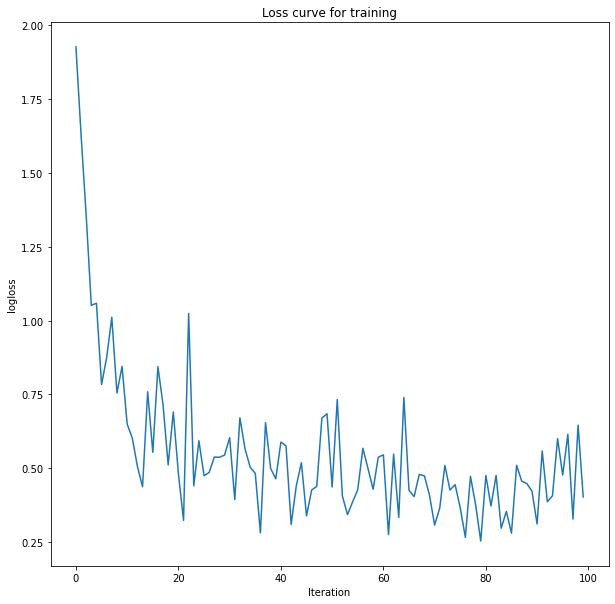

In [11]:
### parameter Initialization

input_size= 784
num_classes= 10
lr = 0.001

epochs = 100


## Model Initialization
model = Network(input_size,num_classes)


## Loss Function and Optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=lr)


##### Train The network ##########
train_loss = []
for epoch in range(epochs):
    for batch_id,(x,y) in  enumerate(train_loader):
        
        x = x.reshape(x.shape[0],-1)
        scores = model(x)
        loss = loss_func(scores,y)
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(loss.detach().numpy().sum())
    
    print('epoch {}/{}  loss={} '.format(epochs, epoch+1,loss))
plot_loss(train_loss)

In [12]:
loss.detach().numpy().sum()

0.4025411



########## Train Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.80      0.83      0.82      6000
           1       0.97      0.96      0.97      6000
           2       0.75      0.77      0.76      6000
           3       0.86      0.87      0.86      6000
           4       0.75      0.79      0.77      6000
           5       0.94      0.92      0.93      6000
           6       0.67      0.59      0.63      6000
           7       0.91      0.91      0.91      6000
           8       0.94      0.95      0.95      6000
           9       0.93      0.94      0.93      6000

    accuracy                           0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



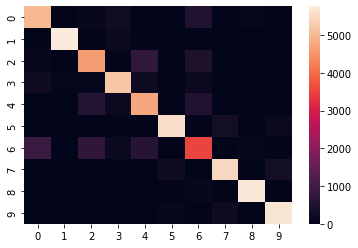



########## Test Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.74      0.73      1000
           3       0.83      0.86      0.85      1000
           4       0.72      0.76      0.74      1000
           5       0.94      0.91      0.92      1000
           6       0.63      0.55      0.59      1000
           7       0.90      0.91      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



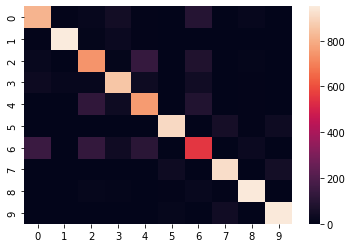

In [13]:
accuracy(train_loader,test_loader,model)

In [14]:
######### CNN Example
class CNN(nn.Module):
    def __init__(self,in_channels=1,num_classes=10):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,8,kernel_size=(2,2),stride=(1,1),padding=(1,1))
        self.conv2 = nn.Conv2d(8,16,kernel_size=(2,2),stride=(1,1),padding=(1,1))
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.fc1 = nn.Linear(16*7*7,10)        
#         self.fc2 = nn.Linear(20,num_classes)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0],-1)
#         print(x.shape)
        x = self.fc1(x)     
#         x = self.fc2(x)       
#         x = self.fc2(x)
        return x

In [ ]:
in_channels= 1
num_classes= 10
lr = 0.0001
epochs = 100

## Model Initialization
model_cnn = CNN(in_channels,num_classes)


## Loss Function and Optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(),lr=lr)


##### Train The network ##########
train_loss = []
for epoch in range(epochs):
    for batch_id,(x,y) in  enumerate(train_loader):
        
#         x = x.reshape(x.shape[0],-1)
        scores = model_cnn(x)
        loss = loss_func(scores,y)
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
    
    train_loss.append(loss.detach().numpy().sum())
    print('epoch {}/{}  loss={} '.format(epochs, epoch+1,loss))
plot_loss(train_loss)
    


        


epoch 100/1  loss=0.8723046779632568 
epoch 100/2  loss=0.6816059350967407 
epoch 100/3  loss=0.321475088596344 


In [ ]:
accuracy(train_loader,test_loader,model_cnn,reshape=False)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('download.jpeg')
cv2.imshow('Image',img)